In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import librosa
import math

In [ ]:
# path to json
DATA_PATH = "/content/drive/MyDrive/music_data.json"

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return  X, y

In [ ]:
X,y=load_data(DATA_PATH)

In [ ]:
X.shape

(9986, 130, 13)

In [ ]:
y.shape

(9986,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Artificial Neural Network

In [ ]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 10s 26ms/step - loss: 6.9348 - accuracy: 0.3166 - val_loss: 3.8076 - val_accuracy: 0.3551
Epoch 2/50
219/219 [==============================] - 4s 19ms/step - loss: 2.7357 - accuracy: 0.4392 - val_loss: 3.0991 - val_accuracy: 0.4105
Epoch 3/50
219/219 [==============================] - 4s 20ms/step - loss: 2.0557 - accuracy: 0.4930 - val_loss: 2.5704 - val_accuracy: 0.4266
Epoch 4/50
219/219 [==============================] - 5s 25ms/step - loss: 1.5959 - accuracy: 0.5551 - val_loss: 2.6391 - val_accuracy: 0.4139
Epoch 5/50
219/219 [==============================] - 4s 18ms/step - loss: 1.3486 - accuracy: 0.5979 - val_loss: 2.4520 - val_accuracy: 0.4566
Epoch 6/50
219/219 [==============================] - 4s 19ms/step - loss: 1.1302 - accuracy: 0.6403 - val_loss: 2.1764 - val_accuracy: 0.4700
Epoch 7/50
219/219 [==============================] - 6s 28ms/step - loss: 0.9515 - accuracy: 0.6901 - val_loss: 2.0679 - val_accuracy: 0.492

In [ ]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

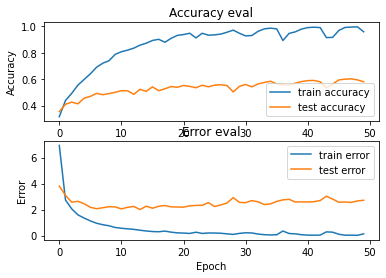

In [ ]:
plot_history(history)

In [ ]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

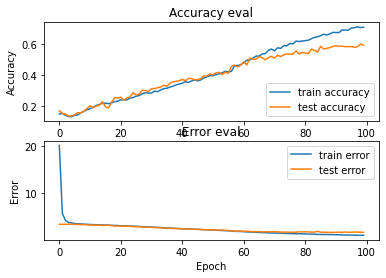

In [ ]:
plot_history(history)

Trying tan x as activation function

In [ ]:
def custom_tan(x):
    # calculate tan(x) using sin(x) and cos(x)
    return tf.math.sin(x) / tf.math.cos(x)

In [ ]:
# Register custom activation function
keras.utils.get_custom_objects().update({'custom_tan': keras.layers.Activation(custom_tan)})

In [ ]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='custom_tan')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1690)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               865792    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
219/219 [==============================] - 6s 20ms/step - loss: 9.3936 - accuracy: 0.1019 - val_loss: 9.7153 - val_accuracy: 0.0965
Epoch 2/50
219/219 [==============================] - 4s 18ms/step - loss: 9.4348 - accuracy: 0.0991 - val_loss: 9.5142 - val_accuracy: 0.0958
Epoch 3/50
219/219 [==============================] - 5s 22ms/step - loss: 9.6217 - accuracy: 0.0944 - val_loss: 9.5269 - val_accuracy: 0.0951
Epoch 4/50
219/219 [==============================] - 5s 22ms/step - loss: 9.5325 - accuracy: 0.0957 - val_loss: 9.7020 - val_accuracy: 0.1018
Epoch 5/50
219/219 [==============================] - 4s 19ms/step - loss: 9.6191 - accuracy: 0.0990 - val_loss: 9.5575 - val_accuracy: 0.1095
Epoch 6/50
219/219 [==============================] - 4s 18ms/step - loss: 9.4628 - accuracy: 0.0979 - val_loss: 9.7606 - val_accuracy: 0.0991
Epoch 7/50
219/219 [==============================] - 6s 27ms/step - loss: 9.5051 - accuracy: 0.1036 - val_loss: 9.3579 - val_accuracy: 0.1025

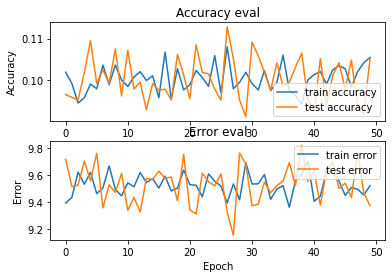

In [ ]:
plot_history(history)

Convolutional Neural Network

In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(5991, 130, 13, 1)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

# 4th conv layer
model_cnn.add(keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

# flatten output and feed it into dense layers
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(256, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))
model_cnn.add(keras.layers.Dense(128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 128, 11, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 64)         18496     
                                                                 
 batch_normalization_1 (Batc  (None, 62, 4, 64)        256       
 hNormalization)                                                 
                                                      

In [ ]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
188/188 [==============================] - 6s 10ms/step - loss: 2.0446 - accuracy: 0.3248 - val_loss: 1.7854 - val_accuracy: 0.3718
Epoch 2/50
188/188 [==============================] - 1s 8ms/step - loss: 1.5158 - accuracy: 0.4545 - val_loss: 1.3017 - val_accuracy: 0.5307
Epoch 3/50
188/188 [==============================] - 2s 10ms/step - loss: 1.3051 - accuracy: 0.5345 - val_loss: 1.1172 - val_accuracy: 0.6035
Epoch 4/50
188/188 [==============================] - 2s 11ms/step - loss: 1.1771 - accuracy: 0.5772 - val_loss: 1.0242 - val_accuracy: 0.6368
Epoch 5/50
188/188 [==============================] - 1s 8ms/step - loss: 1.0513 - accuracy: 0.6308 - val_loss: 0.9621 - val_accuracy: 0.6642
Epoch 6/50
188/188 [==============================] - 2s 9ms/step - loss: 0.9457 - accuracy: 0.6693 - val_loss: 0.8993 - val_accuracy: 0.6903
Epoch 7/50
188/188 [==============================] - 1s 7ms/step - loss: 0.8612 - accuracy: 0.6995 - val_loss: 0.9074 - val_accuracy: 0.6822
Epo

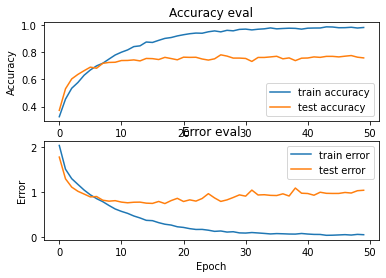

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 0s - loss: 1.0068 - accuracy: 0.7733 - 352ms/epoch - 4ms/step

Test accuracy: 0.7733280062675476


In [ ]:
model_cnn.save("Music_Classifier.h5")

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

Prediction time

In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [ ]:
print("Real Genre:", y_to_predict)

Real Genre: 1


In [ ]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [ ]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 [==============================] - 0s 192ms/step


In [ ]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 1


In [ ]:

# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 8
1/1 [==============================] - 0s 20ms/step
Predicted Genre: 8


In [ ]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 3
1/1 [==============================] - 0s 19ms/step
Predicted Genre: 3

Real Genre: 8
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 6

Real Genre: 7
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 7

Real Genre: 7
1/1 [==============================] - 0s 22ms/step
Predicted Genre: 2

Real Genre: 8
1/1 [==============================] - 0s 23ms/step
Predicted Genre: 3

Real Genre: 7
1/1 [==============================] - 0s 21ms/step
Predicted Genre: 7

Real Genre: 2
1/1 [==============================] - 0s 20ms/step
Predicted Genre: 2

Real Genre: 9
1/1 [==============================] - 0s 19ms/step
Predicted Genre: 9

Real Genre: 3
1/1 [==============================] - 0s 24ms/step
Predicted Genre: 3

Real Genre: 3
1/1 [==============================] - 0s 20ms/step
Predicted Genre: 3


Song Prediction Time!!

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("/content/Music_Classifier.h5")

In [ ]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [ ]:
genre_lookup={0:"metal",1:"classical",2:"jazz",3:"hiphop",4:"pop",5:"blues",6:"rock",7:"country",8:"disco",9:"reggae"}

In [ ]:
new_input=process_input("/content/John Lopker _ Popular USA Majority - American Dream RIP.mp3",30)

In [ ]:
X_to_predict = new_input[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
prediction = reconstructed_model.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_lookup[int(predicted_index)])

1/1 [==============================] - 0s 26ms/step
Predicted Genre: country
